In [1]:
import pandas as pd
prices = pd.read_csv('C:\\projects\\portfolio-risk-assessment\\Data\\processed\\portfolio_prices.csv', index_col=0, parse_dates=True)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
assets = prices.columns.tolist()
print(prices.head())

                 AAPL       MSFT         TLT        VNQ         SPY
Date                                                               
2019-01-02  37.575199  94.789696  102.418190  57.169983  226.285797
2019-01-03  33.832443  91.302544  103.583664  57.569679  220.885986
2019-01-04  35.276722  95.548965  102.384659  58.243641  228.284698
2019-01-07  35.198200  95.670845  102.082787  58.815746  230.084625
2019-01-08  35.869190  96.364494  101.814507  60.030434  232.246399


## Calculate Daily Returns
#Returns are calculated as the percentage change in closing price from the previous day


In [4]:
returns = prices.pct_change().dropna()
returns.to_csv('C:\\projects\\portfolio-risk-assessment\\Data\\processed\\portfolio_returns.csv')
print(returns.head())


                AAPL      MSFT       TLT       VNQ       SPY
Date                                                        
2019-01-03 -0.099607 -0.036788  0.011380  0.006991 -0.023863
2019-01-04  0.042689  0.046509 -0.011575  0.011707  0.033496
2019-01-07 -0.002226  0.001276 -0.002948  0.009823  0.007885
2019-01-08  0.019063  0.007250 -0.002628  0.020652  0.009396
2019-01-09  0.016982  0.014300 -0.001565 -0.001436  0.004673


## Summary Statistics
#Basic stats such as mean, std deviation, min/max help us understand asset risk and potential performance.


In [6]:
print("Price Summary:\n", prices.describe())
print("\nReturns Summary:\n", returns.describe())


Price Summary:
               AAPL         MSFT          TLT          VNQ          SPY
count  1675.000000  1675.000000  1675.000000  1675.000000  1675.000000
mean    142.859471   278.167022   107.978039    79.071039   404.949579
std      57.012959   107.956898    19.736265     9.822850   107.085891
min      33.832443    91.302544    76.767914    46.565006   206.683273
25%     109.834419   200.499985    89.390106    71.671509   311.954742
50%     147.127533   268.558441   102.628502    78.111298   397.455688
75%     183.011887   369.733337   124.957333    88.438786   463.917480
max     258.103729   534.760925   148.634262   100.992157   648.919983

Returns Summary:
               AAPL         MSFT          TLT          VNQ          SPY
count  1674.000000  1674.000000  1674.000000  1674.000000  1674.000000
mean      0.001285     0.001166    -0.000045     0.000396     0.000706
std       0.019853     0.018136     0.010560     0.014731     0.012670
min      -0.128647    -0.147390    -0.0666

## Asset Price Trends
#Line plots reveal trends, boom/bust cycles, and asset market regime changes.


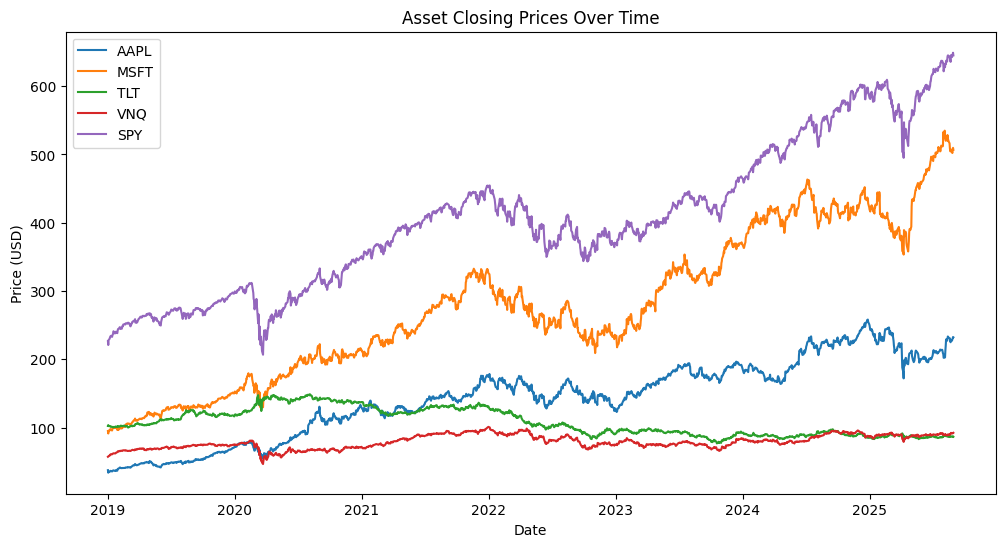

In [8]:
plt.figure(figsize=(12,6))
for ticker in assets:
    plt.plot(prices.index, prices[ticker], label=ticker)
plt.legend()
plt.title("Asset Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


## Return Distribution
#Histograms and boxplots show volatility, extreme moves, and skewness in asset returns.


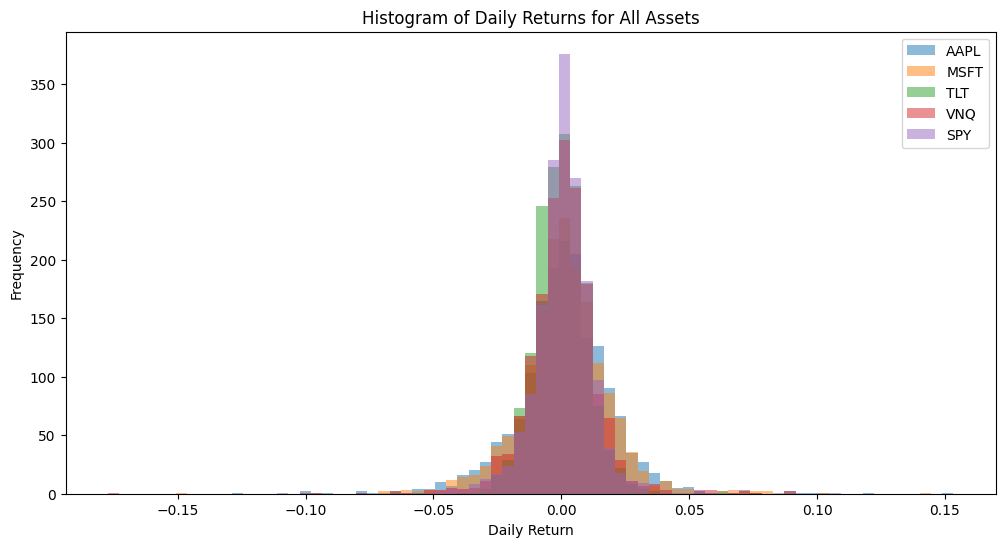

In [10]:
returns.plot(kind='hist', bins=75, alpha=0.5, figsize=(12,6))
plt.title("Histogram of Daily Returns for All Assets")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


## Asset Return Correlations
#Correlation matrix identifies diversification opportunities and risk clusters.

#Positive correlation means assets move together; negative/low correlation means diversification.


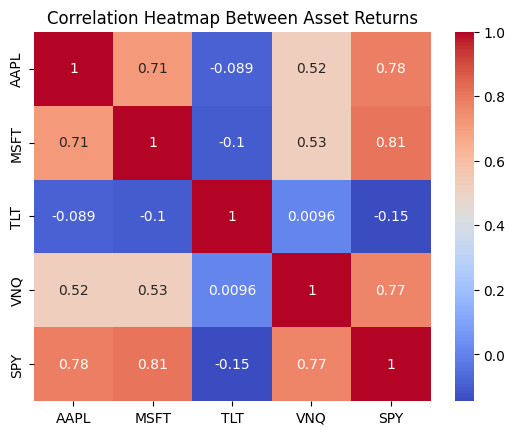

In [12]:
corr_matrix = returns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap Between Asset Returns")
plt.show()


## Observations and Outliers
#Check for unusually large moves, missing data, asset behaviour during crisis periods, etc.


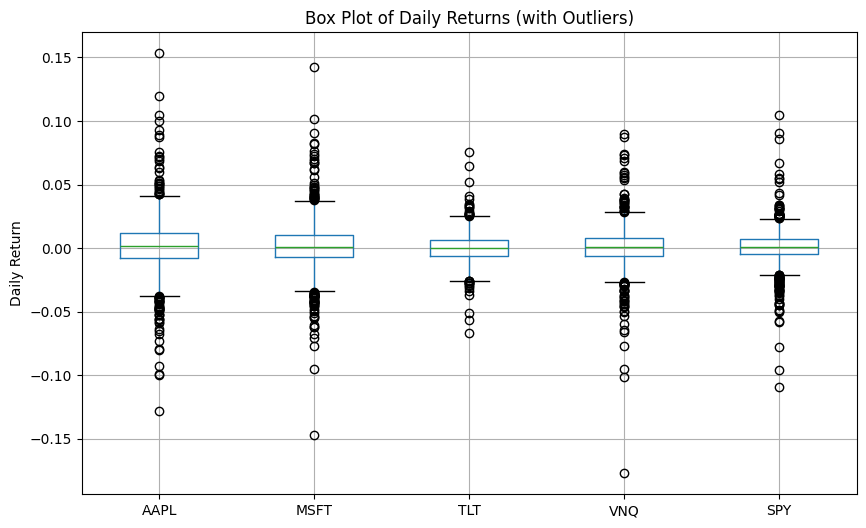

In [16]:
plt.figure(figsize=(10,6))
returns.boxplot()
plt.title("Box Plot of Daily Returns (with Outliers)")
plt.ylabel("Daily Return")
plt.show()

In [17]:
# Example: Identify days where MSFT and AAPL daily returns are outliers (greater than 3 SD)
msft_outliers = returns[(returns['MSFT'].abs() > 3 * returns['MSFT'].std())]
aapl_outliers = returns[(returns['AAPL'].abs() > 3 * returns['AAPL'].std())]
print("MSFT outliers:\n", msft_outliers)
print("AAPL outliers:\n", aapl_outliers)

MSFT outliers:
                 AAPL      MSFT       TLT       VNQ       SPY
Date                                                        
2020-02-27 -0.065368 -0.070459  0.010849 -0.053216 -0.044912
2020-03-02  0.093100  0.066539 -0.007357  0.042711  0.043306
2020-03-09 -0.079092 -0.067773  0.027103 -0.077093 -0.078094
2020-03-10  0.072022  0.068384 -0.051258  0.042249  0.051744
2020-03-12 -0.098755 -0.094838  0.006197 -0.101303 -0.095677
2020-03-13  0.119808  0.142169 -0.022603  0.087278  0.085486
2020-03-16 -0.128647 -0.147390  0.064765 -0.177277 -0.109424
2020-03-17  0.043970  0.082337 -0.066683  0.057807  0.053992
2020-03-24  0.100325  0.090896 -0.018614  0.089967  0.090603
2020-03-26  0.052623  0.062551  0.004922  0.070522  0.058390
2020-03-30  0.028538  0.070341 -0.008229  0.021841  0.032476
2020-04-06  0.087237  0.074367 -0.002611  0.074074  0.067166
2020-08-03  0.025197  0.056241 -0.005035 -0.013269  0.006952
2020-09-03 -0.080061 -0.061947  0.002842 -0.012001 -0.034414
2022-07-

## EDA Summary
- All assets show different levels of risk and return; stocks had higher mean daily returns but also greater volatility.
- Asset correlations suggest moderate diversification in the portfolio.
- Some assets show sharp drawdowns during certain periods, indicating market regime change or shocks.
